In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from petra import make_catalog_mv_normal
from petra.posterior_chain import PosteriorChain

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
np.random.seed(0)
chain = np.zeros((10_000, 2))
chain_signal_1 = np.random.uniform(0, 1, 10000)
chain_signal_2 = np.random.uniform(0, 1, 10000)
chain[::2, 0] = chain_signal_1[::2]
chain[1::2, 0] = np.nan
chain[::3, 1] = chain_signal_2[::3]
chain[1::3, 1] = np.nan
chain[2::3, 1] = np.nan
pc = PosteriorChain(chain, 2, 1)

In [7]:
result = make_catalog_mv_normal(pc, max_num_sources=2, num_iterations=200, initialization_param_index=0, shuffle_seed=1)

Initializing with univariate normal distribution.

Sorting the posterior chain:
	Maximum number of iterations: 200
	Maximum number of source labels:2

Iteration 1: Difference in cost of assignment is 1.504964622163926 with total cost of 1.504964622163926.
	Probabilities in model: [0.641  0.1924]
Iteration 2: Difference in cost of assignment is -0.2516053280707218 with total cost of 1.2533592940932041.
	Probabilities in model: [0.6667 0.1667]
Iteration 3: Difference in cost of assignment is -0.03131413122639293 with total cost of 1.2220451628668112.
	Probabilities in model: [0.6667 0.1667]
Iteration 4: Difference in cost of assignment is -0.0148095272540405 with total cost of 1.2072356356127707.
	Probabilities in model: [0.6667 0.1667]
Iteration 5: Difference in cost of assignment is -0.0037820020850407587 with total cost of 1.20345363352773.
	Probabilities in model: [0.6667 0.1667]
Iteration 6: Difference in cost of assignment is 0.0 with total cost of 1.20345363352773.
	Probabilities 

In [ ]:
plt.bar(range(len(result)), result)
plt.xlabel("Source index")
plt.ylabel("Astrophysical probability")

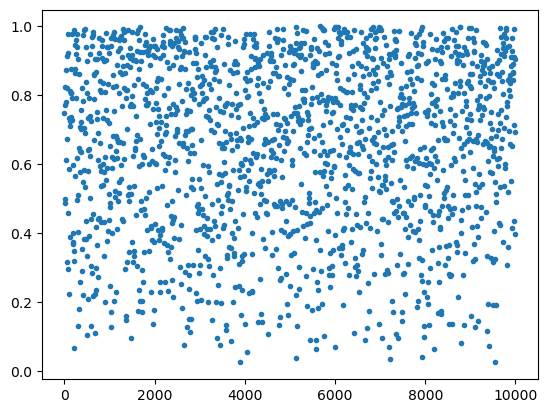

In [9]:
plt.plot(result[:, 1, 0], '.')